In [1]:
#Importing Libaries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

data = pd.read_csv('auto-mpg.data',names=column_names,sep=" ",skipinitialspace=True,na_values="?",comment='\t')

In [3]:
#Inspecting data
data.head() 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
#Shape of dataset (Rows,Columns)
data.shape

(398, 8)

In [6]:
#DataFrame Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [7]:
#Summary Statistics
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
#Datatypes
data.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [9]:
#Inspecting missing values in the dataset
data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
#Data with null values
data[data['Horsepower'].isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [11]:
#Filling null values
data['Horsepower'] = data['Horsepower'].fillna(data['Horsepower'].median())

In [12]:
#Inspecting the missing values again
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

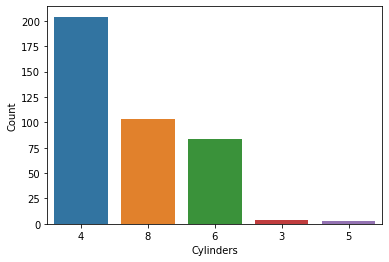

In [13]:
cyl = data['Cylinders'].value_counts().sort_values(ascending=False)

#barplot of cylinders vs count
sns.barplot(cyl.index,cyl.values,order=[4,8,6,3,5])
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

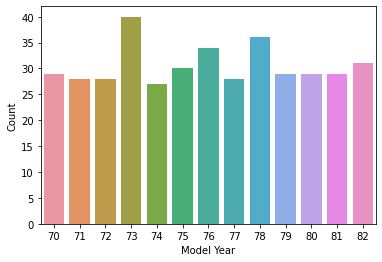

In [14]:
year = data['Model Year'].value_counts()

#barplot of Model Year vs Count
sns.barplot(x=year.index,y=year.values)#hue
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

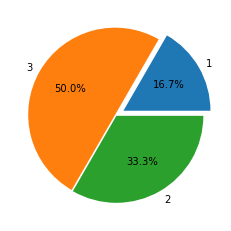

In [15]:
origin = data['Origin'].unique()

#Pie plot of Origin feature
plt.pie(data['Origin'].unique(),labels=data['Origin'].unique(),autopct='%1.1f%%',explode=[0.1,0.01,0.01])
plt.show()

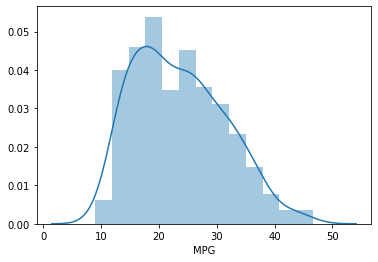

In [16]:
#distplot of target variable
sns.distplot(data['MPG'])
plt.show()

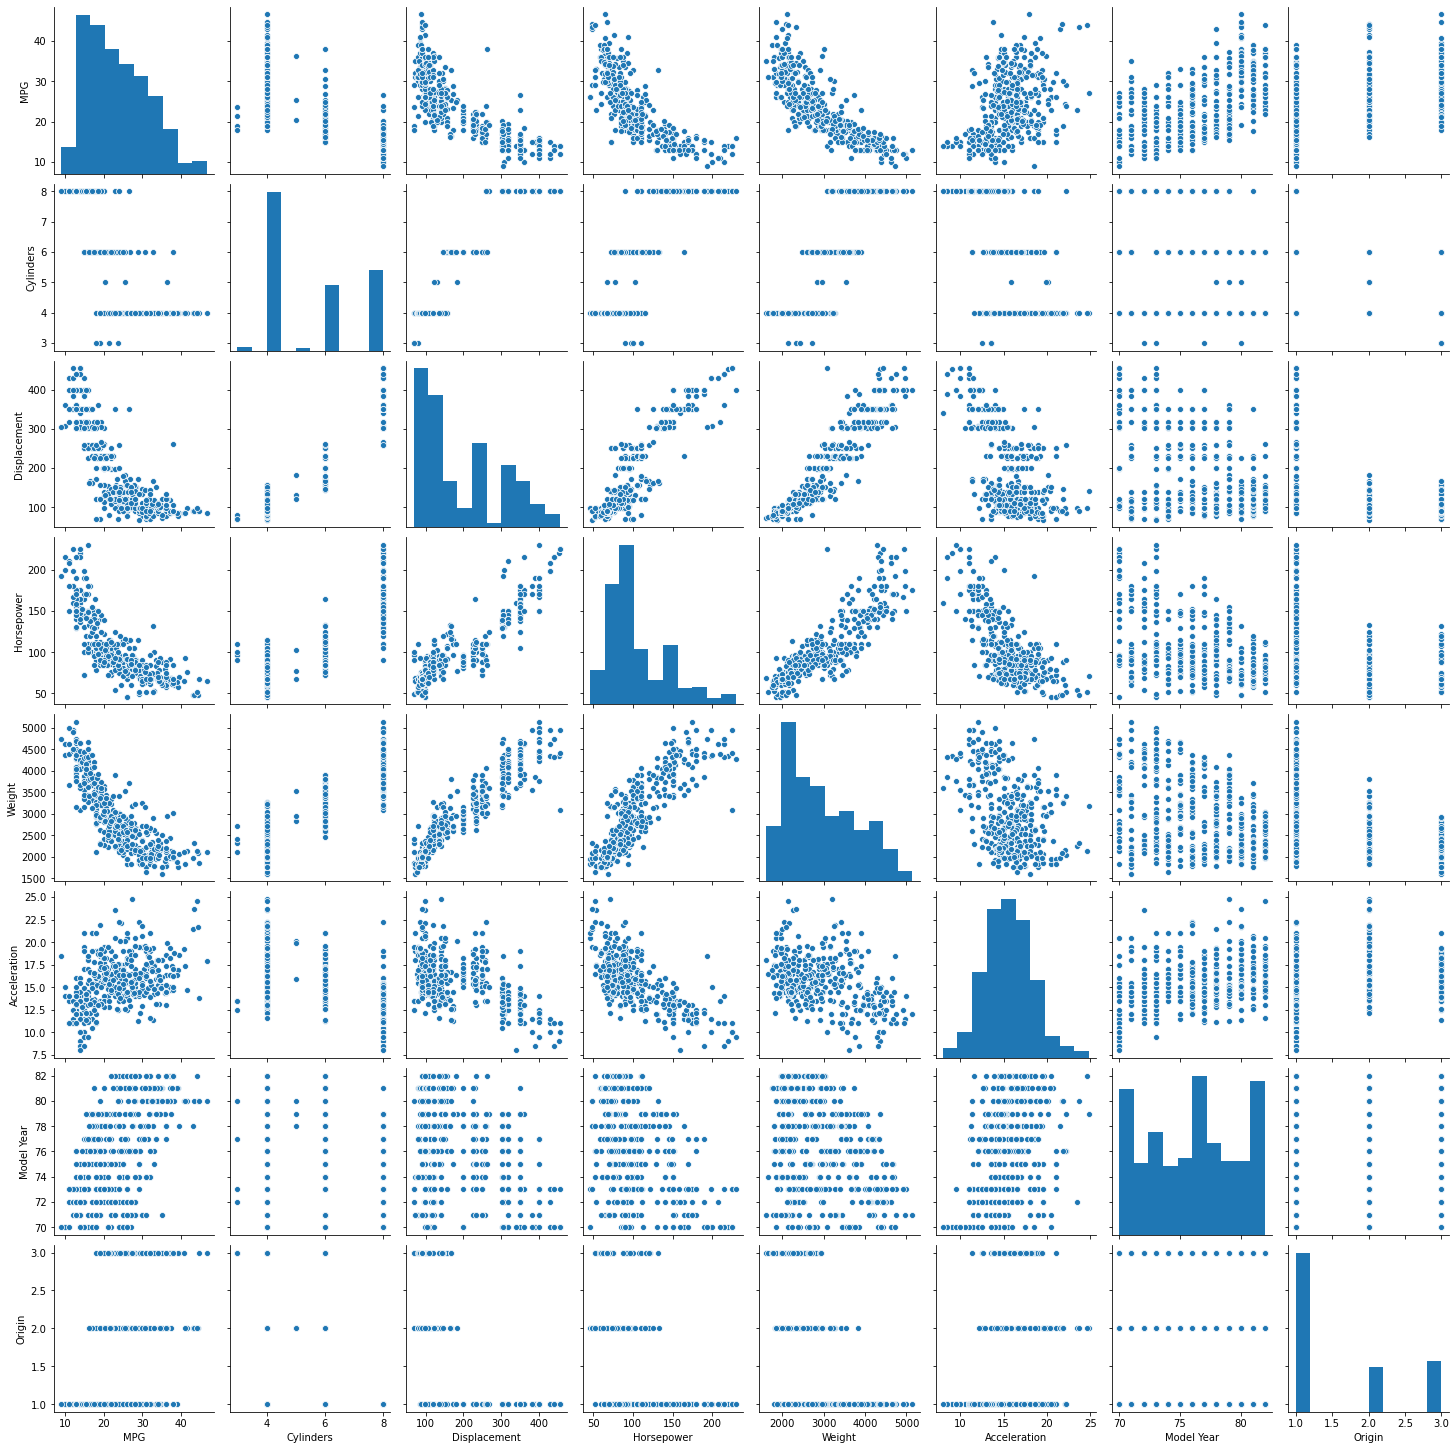

In [17]:
#Pairwise distribution
sns.pairplot(data=data)
plt.show()

In [18]:
#Corelation of Target with its Features
DataFrame(data.corr()["MPG"].sort_values(ascending=False))

,MPG
MPG,1.000000
Model Year,0.579267
Origin,0.563450
Acceleration,0.420289
Horsepower,-0.773453
Cylinders,-0.775396
Displacement,-0.804203
Weight,-0.831741


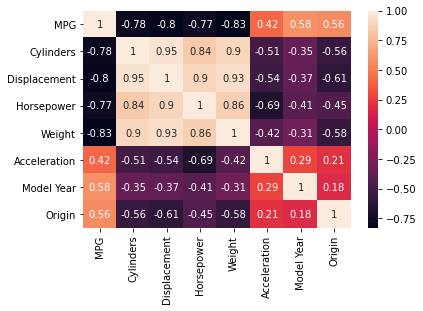

In [19]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [20]:
#Scaling features(MinMaxScaler)
def scale(a):
    return (a-a.min())/(a.max()-a.min())

In [21]:
data_scale = data.copy()

In [22]:
data_scale ['Displacement'] = scale(data_scale['Displacement'])
data_scale['Horsepower'] = scale(data_scale['Horsepower'])
data_scale ['Acceleration'] = scale(data_scale['Acceleration'])
data_scale ['Weight'] = scale(data_scale['Weight'])
data_scale['MPG'] = scale(data_scale['MPG'])

In [23]:
data_scale.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [24]:
X = data_scale.iloc[:,1:]

In [25]:
Y = data_scale.iloc[:,0]

In [26]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=43)
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
print('MEAN ABSOLUTE ERROR :', mean_absolute_error(Y_test,Y_pred))
print('MEAN SQUARED ERROR :', mean_squared_error(Y_test,Y_pred))
print('ROOT MEAN SQ ERROR :', np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('r2 :',r2_score(Y_test,Y_pred))

MEAN ABSOLUTE ERROR : 0.0655117720020911
MEAN SQUARED ERROR : 0.007611219491089658
ROOT MEAN SQ ERROR : 0.08724230333438966
r2 : 0.8280466156935707


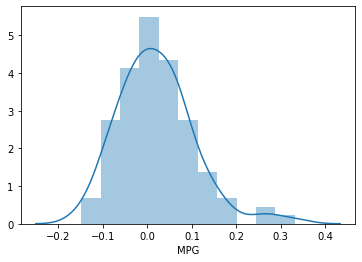

In [29]:
#Residuals
sns.distplot(Y_test-Y_pred)
plt.show()

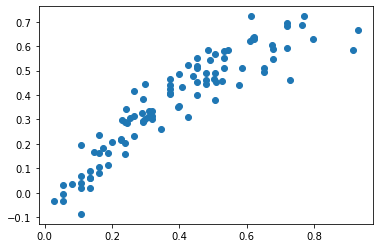

In [30]:
plt.scatter(Y_test,Y_pred)
plt.show()